### Q1 and Q2 Scrape details of the product vertical from Amazon.in

In [1]:
!pip install selenium

In [19]:
import selenium
import pandas as pd
from selenium import webdriver
import os
import time
import urllib.request
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import ElementClickInterceptedException

In [20]:
driver=webdriver.Chrome("chromedriver.exe")

In [21]:
url="https://www.amazon.in/" 
driver.get(url)

In [22]:
search=driver.find_element_by_id("twotabsearchtextbox")
search.click()

In [23]:
search.send_keys("bat")

In [24]:
search1=driver.find_element_by_xpath("//*[@id='nav-search-submit-button']")
search1.click()

In [18]:
brandname_=[]
nameoftheproduct_=[]
rating_=[]
no_of_rating_=[]
price_=[]
exchange_=[]
expected_delivery_=[]
availability_=[]
product_url_=[]
page_urls=[]

In [50]:

        
time.sleep(3)       
no_of_rating=driver.find_elements_by_xpath("//span[@class='a-size-base']")
for i in no_of_rating:
    if i.text is None :
        no_of_rating_.append("--") 
    else:
        no_of_rating_.append(i.text)
        

    
page_num=input("enter number ofpages")
for i in range(1,int(page_num)+1):
    url1="https://www.amazon.in/s?k=bat&ref=nb_sb_noss_2"+str(i)
    driver.get(url1)
    
    
    brandname=driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
    nameoftheproduct=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']")
    rating=driver.find_elements_by_xpath("//span[@class='a-icon-alt']")
    no_of_rating=driver.find_elements_by_xpath("//span[@class='a-size-base']")
    price=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
    expected_delivery=driver.find_elements_by_xpath("//div[@class='a-row s-align-children-center']")
    availability=driver.find_elements_by_xpath("//div[@class='a-row a-size-base a-color-secondary']")
    product_url=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    
    print("amazonpages in page"+str(i))
    print(len(brandname))
    print(len(nameoftheproduct))
    print(len(rating))
    print(len(no_of_rating))
    print(len(price))
    print(len(expected_delivery))
    print(len(availability))
    print(len(product_url))
    
    
    for i in brandname:
        if i.text is None :
            brandname_.append("--")
        else:
            brandname_.append(i.text.split(" ")[:3])
    
    for i in nameoftheproduct:
        if i.text is None :
            nameoftheproduct_.append("--")
    else:
        nameoftheproduct_.append(i.text)
        
    for i in rating:
        if i.text is None :
            rating_.append("--") 
    else:
        rating_.append(i.text)
    
    for i in no_of_rating:
        if i.text is None :
            no_of_rating_.append("--") 
    else:
        no_of_rating_.append(i.text) 
        

    for i in price:
        if i.text is None:
            price_.append('--')
    else:
        price_.append(i.text)
          
            
    for i in expected_delivery:
        if i.text is None:
            expected_delivery_.append('--')
    else:
        expected_delivery_.append(i.text)
    
         
    for i in availability:
        if i.text is None:
            availability_.append('-')
    else:
        availability_.append(i.text)

    try:   
        for i in product_url:
            product_url_.append(i.get_attribute('href'))
    except:
          product_url_.append('-')

enter number ofpages3
amazonpages in page1
65
60
63
56
66
60
14
65
amazonpages in page2
65
60
63
56
66
60
14
65
amazonpages in page3
65
60
63
56
66
60
14
65


In [51]:
import pandas as pd
product_detail=pd.DataFrame({})
product_detail['Brand Name']=brandname_[:74]
product_detail['Name of  the product']=nameoftheproduct_[:74]
product_detail['Ratings']=rating_[:74]
product_detail['No of Ratings']=no_of_rating_[:74]
product_detail['Prices']=price_[:74]
product_detail['Expected Delivery']=expected_delivery_[:74]
product_detail['Availability']=availability_[:74]
product_detail['Product Url']=product_url_[:74]
product_detail

,Brand Name,Name of the product,Ratings,No of Ratings,Prices,Expected Delivery,Availability,Product Url
0,DSC Intense Spirit Kashmir Willow Cricket Bat ...,DSC Intense Spirit Kashmir Willow Cricket Bat ...,3,3,"1,799","Get it by Sunday, July 25",Currently not deliverable,DSC Intense Spirit Kashmir Willow Cricket Bat ...
1,DSC Condor Sizzler Kashmir Willow Cricket Bat ...,DSC Condor Sizzler Kashmir Willow Cricket Bat ...,6,6,"1,907","Get it by Tomorrow, July 22",Only 1 left in stock.,DSC Condor Sizzler Kashmir Willow Cricket Bat ...
2,KOOKABURRA KB Blaze 700 Adult English Willow C...,KOOKABURRA KB Blaze 700 Adult English Willow C...,2,2,"5,380","Get it by Tomorrow, July 22",Save ₹5 with coupon,KOOKABURRA KB Blaze 700 Adult English Willow C...
3,DSC Scorer Kashmir Willow Cricket Bat Short Ha...,DSC Scorer Kashmir Willow Cricket Bat Short Ha...,779,779,"1,405","Get it by Monday, July 26",Currently not deliverable,DSC Scorer Kashmir Willow Cricket Bat Short Ha...
4,Kookaburra Wooden Tennis Cricket Bat Size 6 fo...,Kookaburra Wooden Tennis Cricket Bat Size 6 fo...,8,8,315,"Get it Monday, July 26 - Tuesday, July 27",Save ₹20 with coupon (limited sizes/colours),Kookaburra Wooden Tennis Cricket Bat Size 6 fo...
...,...,...,...,...,...,...,...,...
69,Kookaburra Wooden Tennis Cricket Bat Size 6 fo...,Traders Kookaburra VERVR 60 POPLER Cricket BAT...,3,3,"1,405","Get it Saturday, July 24 - Sunday, July 25",Only 1 left in stock.,Kookaburra Wooden Tennis Cricket Bat Size 6 fo...
70,Ske Popular Willow Cricket Bat with Ball and B...,Traders Kookaburra Kahuna 400 (Full Size) Best...,3,3,315,"Get it by Monday, July 26",Only 1 left in stock.,Ske Popular Willow Cricket Bat with Ball and B...
71,GM Octane Mini Cricket Bat (Not meant for play...,Traders MRF VIRAT KOHLI Grand Edition Tennis P...,11,11,412,"Get it by Monday, July 26",Only 1 left in stock.,GM Octane Mini Cricket Bat (Not meant for play...
72,new balance DC-280 / TC-260 Kashmir Willow Cri...,Brinda Fab Ceat Sixer Series Selected Poplar W...,182,182,165,"Get it by Monday, July 26",Only 1 left in stock.,new balance DC-280 / TC-260 Kashmir Willow Cri...


In [122]:
product_detail.to_csv('AmazonDetail.csv')

### Q3 Images.Google.Com

In [1]:
!pip install selenium

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
import os
import time
import urllib.request
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import ElementClickInterceptedException

In [41]:
driver=webdriver.Chrome("chromedriver.exe")

In [42]:
url="https://www.images.Google.com/" 
driver.get(url)

In [22]:
search=driver.find_element_by_xpath("//span[@class='QCzoEc z1asCe MZy1Rb']")
search.click()

In [23]:
search1=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search1.click()

In [24]:
search1.send_keys("fruits")

In [29]:
search1.click()

In [30]:
search_button=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
search_button.click()

In [44]:
fruit_image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
fruit_image

[<selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="32f3873c-6ccd-4e28-88f6-350cd71fea20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="43e9a113-c11f-435a-8970-b23b8550d798")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="21bd533c-6e1d-4322-935f-25e7417b201f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="264067e8-05ac-4ab5-9b58-618cb8b59454")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="01b75705-2416-453d-aa01-8cfb0d388f05")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="757ca795-805e-41f2-9bec-a970084bf107")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="55fdc416-d9d4-4735-871e-b1

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROYH-uaHxJxZllD4i4p-a6Jx_gDHTAudnBxQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS62r1-dyhhAiaOPeU9qZzlAGrbmoTygqATCQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRenGZHB84JcIXCX7jMQUkZt7GFpp8mK1x7RA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTo4_shfG85msF591Y45W4T800Efmd5L8ksvg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-_Qp0xHt0hA8k_qVLW0cu9tbB3rtH1oC3qQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRz2_X34ibmgT-ieSfqh_gthA0gBpYJaI-FOg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREf50eNWUXvnoP0sP9x8SZUILcwQHHImfm1A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4
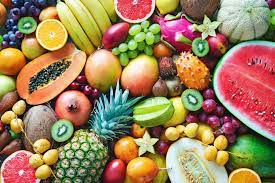
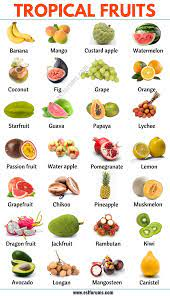
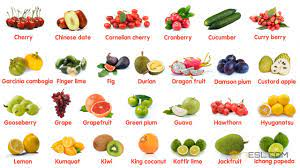
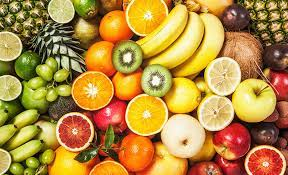
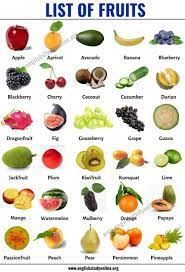
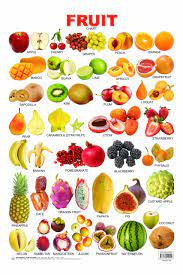
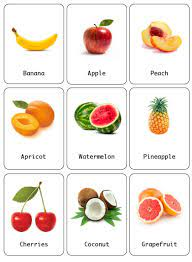
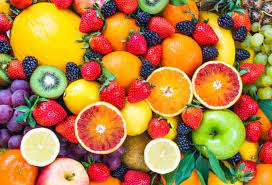
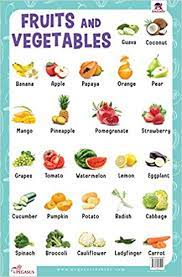
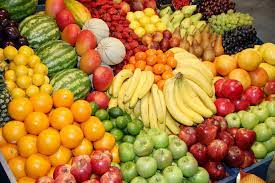
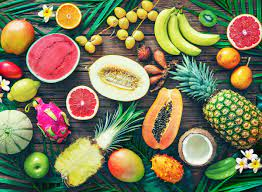
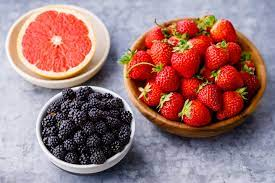
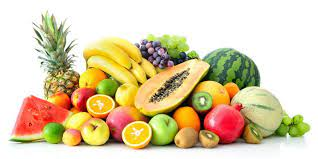
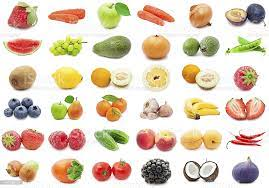
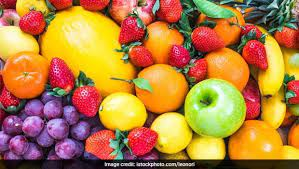
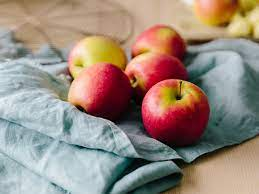
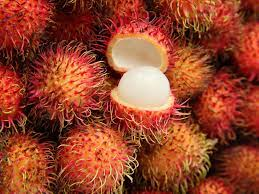
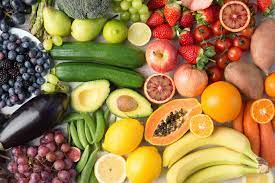
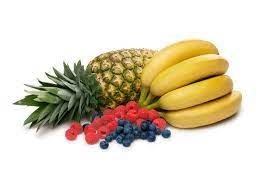
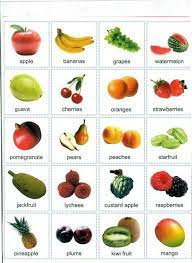

In [47]:
fruits=[]
for i in fruit_image:
    fruits.append(i.get_attribute("src"))
fruits

In [53]:
search2=driver.find_element_by_xpath("//input[@class='og3lId']")
search2.clear()

In [54]:
search2=driver.find_element_by_xpath("//input[@class='og3lId']")
search2.click()

In [55]:
search2.send_keys("cars")

In [56]:
search2.click()

In [57]:
search_button=driver.find_element_by_xpath("//button[@class='rCGXm']")
search_button.click()

In [64]:
car_image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
car_image

[<selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="6da9c3a5-58eb-47f7-9f17-594c77b15085")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="fb40011f-21b2-468f-b5ac-d24fd21b5917")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="e2c7b3a5-8bc3-4293-b1a3-ab3fb63af35b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="c03446b4-4b52-4ef0-a57b-f027b2280b4e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="9a64a0dd-16b4-4b3e-bbf3-3ae859e2f3bd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="1b343d36-af52-4a8e-ba21-cef3a27483fa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="ab661761-961c-4f71-beb6-28

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIgXhyk3oGsPwGKDM6WdLJBMAquLQurOKNXg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxbjXwkwVr-14A0KU5__5zZb-b5nUEyJv2Rg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyMurcEluQ5blOUZgaUN_RAAsFJYgp37mLXQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3HcVG27eK--uy6usCydFQ3udgQUt8firi2A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-NmDxyu_Rzo6oO5OMgCdRWgTkkA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0RH3CjFt4bVDpgqpoNsZKRoXu2GgfHulhvw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_x293qbMfJ-DERXyBPoslYd-D8fk51zr-IQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsrYZ8FpwbKRzyuPzYY778qdzRcnXYf90D5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlpGoItMqWkO
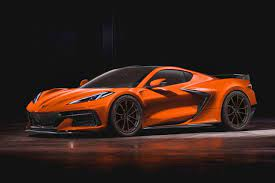
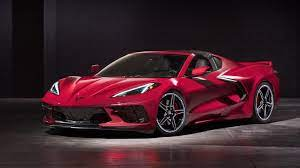
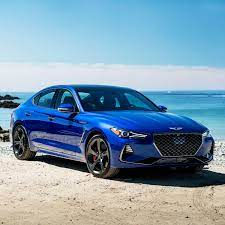
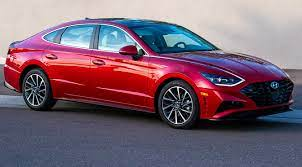
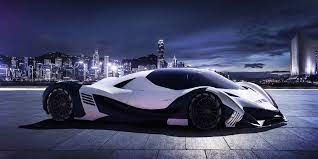
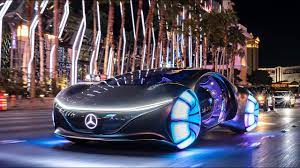
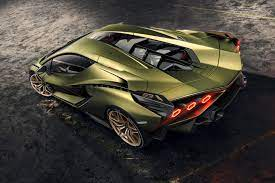
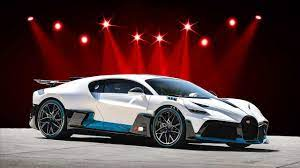
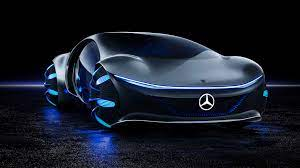
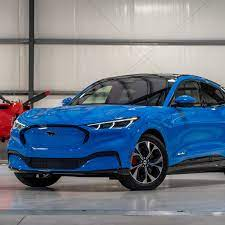
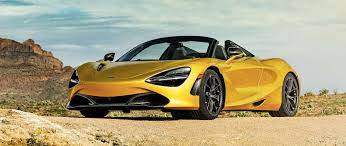
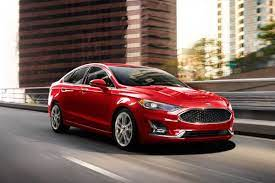
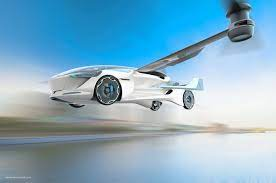
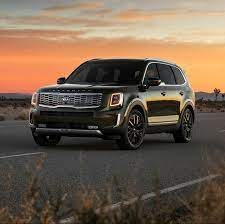
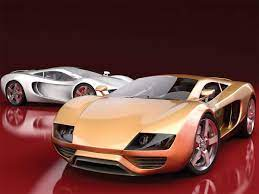
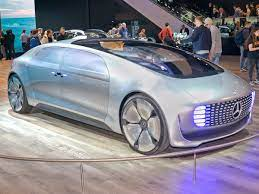
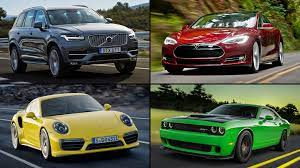
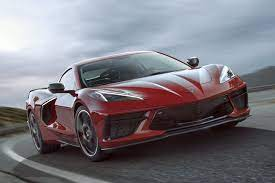
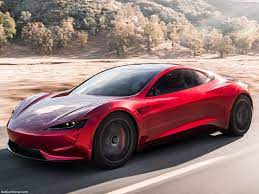
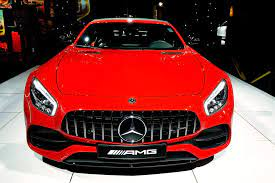

In [65]:
cars=[]
for i in car_image:
    cars.append(i.get_attribute("src"))
cars

In [67]:
search2=driver.find_element_by_xpath("//input[@class='og3lId']")
search2.clear()

In [68]:
search2=driver.find_element_by_xpath("//input[@class='og3lId']")
search2.click()

In [69]:
search2.send_keys("Machine Learning")

In [70]:
search2.click()

In [73]:
search_button=driver.find_element_by_id("BIqFsb")
search_button.click()

In [74]:
ML_image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
ML_image

[<selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="65a833af-8323-4da7-8c3a-9b42e1dec2ff")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="5cdd5eaf-185d-4951-9e03-da2f64dd19f3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="9fcf78e9-cb8f-4982-bbb1-b3f39495ee42")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="42c4a379-738b-4621-8e60-da66f5a47806")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="a3d58deb-8b20-4732-8e88-28915efe4d97")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="f890cd8d-416c-4708-a249-166d8ee5bd7e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="62364d07213ad5347d10b6f33e1617c0", element="b3427d3f-c68d-479c-98a4-3c

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSx7Od_I1PpCMQCLAWuR5ZPoSrSbkbUWa0Hig&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnnXZkPIuKunti63oDZ3qPDF-9YlYYuJaTmQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyUsvp8lFRGIPJc6R5KIfzr2Y-3uklW1hZLg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-qD2rRXFGMce45la7pokLMZpwRAad6sZKAw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMFWgErcxBOju7NYcTXjCkOAcL_D7xVuskdw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZc_PTpvBRL66czmsoFIqQhIpsE7sI71vIGA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSYylHvRw4uZOGozJG1VYgdMReGDGuxSwxPQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5LFpAD-FPmniqb8OCMo64l4q87A37IN6UMQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWwQAsLQGePm
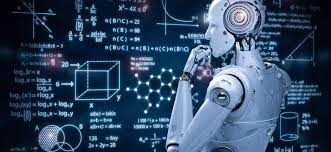
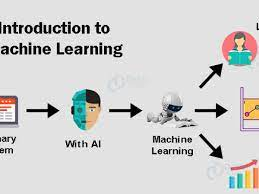
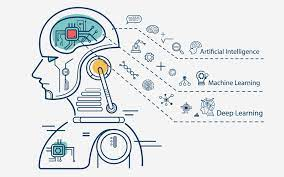
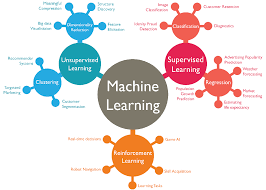
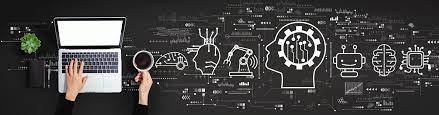
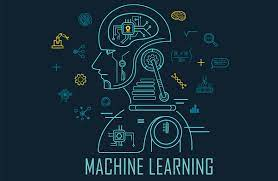
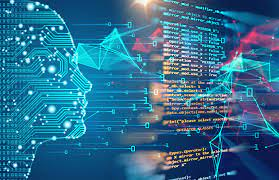
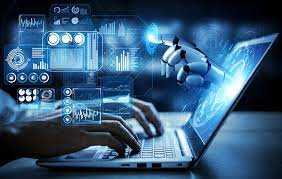
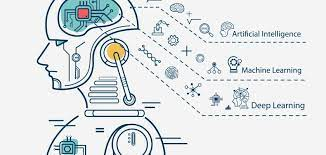
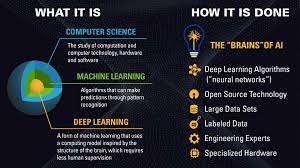
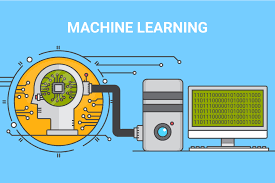
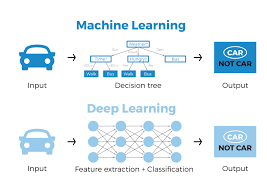
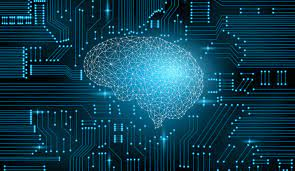
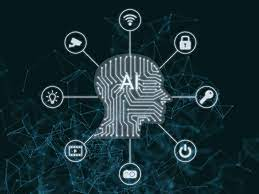
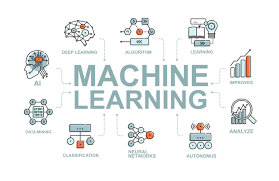
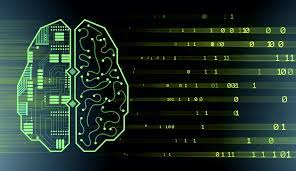
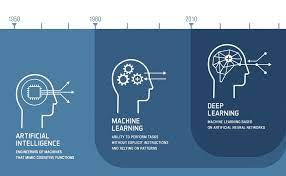
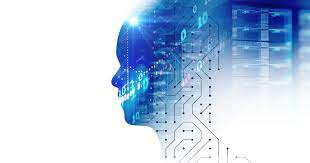
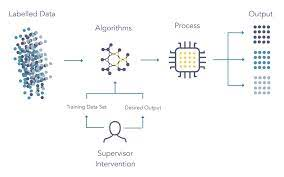
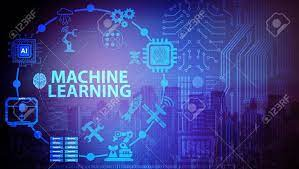

In [75]:
ML=[]
for i in ML_image:
    ML.append(i.get_attribute("src"))
ML

In [76]:
images_=pd.DataFrame({})
images_['Fruit Image']=fruits[:100]
images_['Car Images']=cars[:100]
images_['ML Images']=ML[:100]
images_

,Fruit Image,Car Images,ML Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [77]:
images_.to_csv('GoogleImages.csv')

### Q4 Flipkart Details

In [110]:
driver=webdriver.Chrome("chromedriver.exe")

In [111]:
url='http://www.flipkart.com/'
driver.get(url)

In [112]:
cross_click=driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
cross_click.click()

In [113]:
search=driver.find_element_by_xpath("//input[@class='_3704LK']")
search.click()

In [114]:
search.send_keys("iphone 12 pro max gold 512")

In [115]:
search_button=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [120]:
smartphone=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
smartphone

[<selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="f5f9d032-2c48-4c77-b371-0994b19af73f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="69014c45-6ce8-4dda-b0c5-e983d91c7b1d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="847d0dc8-3bcb-45b7-b978-5833ce3a078f")>]

In [180]:
smartphone_name=[]
brand_name=[]
color=[]
Rom=[]
for i in smartphone:
    brand_name.append(i.text.split(' ')[0])
brand_name

['APPLE', 'APPLE', 'APPLE']

In [181]:
for i in smartphone:
    smartphone_name.append(i.text.split(' ')[1:5])
smartphone_name

[['iPhone', '12', 'Pro', 'Max'],
 ['iPhone', '12', 'Pro', 'Max'],
 ['iPhone', '11', 'Pro', 'Max']]

In [182]:
for i in smartphone:
    color.append(i.text.split(' ')[5:6])
color

[['(Gold,'], ['(Gold,'], ['(Gold,']]

In [183]:
for i in smartphone:
    Rom.append(i.text.split(',')[-1])
Rom

[' 512 GB)', ' 128 GB)', ' 256 GB)']

In [184]:
price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
price

[<selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="6b640e4f-4998-40a9-9c37-e8e7c08dd59d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="fe39abf3-1cc1-4cd3-bc6e-5b145bedd7a6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="defc7fbb-d178-4b16-a486-d192c0c10edc")>]

In [185]:
price_=[]
for i in price:
    price_.append(i.text)
price_

['₹1,55,900', '₹1,25,900', '₹1,31,900']

In [186]:
phone_detail=driver.find_elements_by_xpath("//div[@class='fMghEO']")
phone_detail

[<selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="ec88f8eb-5cdd-4a61-b940-d6c95c1c76af")>,
 <selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="b28e4dd7-741c-4676-8bf2-bc9979b983dc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="372b545e6478e38aabf8e60b7e97f616", element="d8b21bdc-b987-466a-8070-f081fffabaa1")>]

In [226]:
processor=[]
display_size=[]
primary_camera=[]
secondary_camera=[]
resolution_type=[]
for i in phone_detail:
    processor.append(i.text.split("\n")[3:4])
processor

[['A14 Bionic Chip with Next Generation Neural Engine Processor'],
 ['A14 Bionic Chip with Next Generation Neural Engine Processor'],
 ['A13 Bionic Chip Processor']]

In [227]:
for i in phone_detail:
    display_size.append(i.text.split("\n")[1:2])
display_size

[['17.02 cm (6.7 inch) Super Retina XDR Display'],
 ['17.02 cm (6.7 inch) Super Retina XDR Display'],
 ['16.51 cm (6.5 inch) Super Retina XDR Display']]

In [228]:
for i in phone_detail:
    primary_camera.append(i.text.split("\n")[2:3])
primary_camera

[['12MP + 12MP + 12MP | 12MP Front Camera'],
 ['12MP + 12MP + 12MP | 12MP Front Camera'],
 ['12MP + 12MP + 12MP | 12MP Front Camera']]

In [229]:
for i in phone_detail:
    secondary_camera.append(i.text.split("|")[1].split("\n")[0])
secondary_camera

[' 12MP Front Camera', ' 12MP Front Camera', ' 12MP Front Camera']

In [230]:
for i in phone_detail:
    resolution_type.append(i.text.split(")")[1].split("\n")[0])
resolution_type

[' Super Retina XDR Display',
 ' Super Retina XDR Display',
 ' Super Retina XDR Display']

In [237]:
url=[]
for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
    url.append(i.get_attribute("href"))
url

['https://www.flipkart.com/apple-iphone-12-pro-max-gold-512-gb/p/itmd164e2fef2871?pid=MOBFWBYZ4AG3FGNW&lid=LSTMOBFWBYZ4AG3FGNWD7EJJK&marketplace=FLIPKART&q=iphone+12+pro+max+gold+512&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=5c88adcd-33e4-4099-b074-3c074abb2c2e.MOBFWBYZ4AG3FGNW.SEARCH&ppt=hp&ppn=homepage&ssid=tq6jkwrbe80000001626423390603&qH=cffe8831f13d4d36',
 'https://www.flipkart.com/apple-iphone-12-pro-max-gold-128-gb/p/itme3ae592065711?pid=MOBFWBYZQVKT77YH&lid=LSTMOBFWBYZQVKT77YH4V9K25&marketplace=FLIPKART&q=iphone+12+pro+max+gold+512&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=5c88adcd-33e4-4099-b074-3c074abb2c2e.MOBFWBYZQVKT77YH.SEARCH&ppt=hp&ppn=homepage&ssid=tq6jkwrbe80000001626423390603&qH=cffe8831f13d4d36',
 'https://www.flipkart.com/apple-iphone-11-pro-max-gold-256-gb/p/itm94c6536eefc46?pid=MOBFKCTS7HCHSPFH&lid=LSTMOBFKCTS7HCHSPFH8FVBCX&marketplace=FLIPKART&q=iphone+12+pro+max+gold+512&store=tyy%2F4io&srno=s_1_3&

In [238]:
smartphone_details=pd.DataFrame({})
smartphone_details['Brand Name']=brand_name
smartphone_details['smartphone Name']=smartphone_name
smartphone_details['Color']=color
smartphone_details['Rom']=Rom
smartphone_details['Primary camera']=primary_camera
smartphone_details['Secondary camera']=secondary_camera
smartphone_details['Processor']=processor
smartphone_details['Display size']=display_size
smartphone_details['Resolution Type']=resolution_type
smartphone_details['Price']=price_
smartphone_details['Product url']=url
smartphone_details

,Brand Name,smartphone Name,Color,Rom,Primary camera,Secondary camera,Processor,Display size,Resolution Type,Price,Product url
0,APPLE,"[iPhone, 12, Pro, Max]","[(Gold,]",512 GB),[12MP + 12MP + 12MP | 12MP Front Camera],12MP Front Camera,[A14 Bionic Chip with Next Generation Neural E...,[17.02 cm (6.7 inch) Super Retina XDR Display],Super Retina XDR Display,"₹1,55,900",https://www.flipkart.com/apple-iphone-12-pro-m...
1,APPLE,"[iPhone, 12, Pro, Max]","[(Gold,]",128 GB),[12MP + 12MP + 12MP | 12MP Front Camera],12MP Front Camera,[A14 Bionic Chip with Next Generation Neural E...,[17.02 cm (6.7 inch) Super Retina XDR Display],Super Retina XDR Display,"₹1,25,900",https://www.flipkart.com/apple-iphone-12-pro-m...
2,APPLE,"[iPhone, 11, Pro, Max]","[(Gold,]",256 GB),[12MP + 12MP + 12MP | 12MP Front Camera],12MP Front Camera,[A13 Bionic Chip Processor],[16.51 cm (6.5 inch) Super Retina XDR Display],Super Retina XDR Display,"₹1,31,900",https://www.flipkart.com/apple-iphone-11-pro-m...


In [239]:
smartphone_details.to_csv('SmartPhoneDetails.csv')

### Q6 Funding deals from trak.in

In [52]:
driver=webdriver.Chrome("chromedriver.exe")

In [53]:
url='http://www.trak.in/'
driver.get(url)

In [57]:
click_funding=driver.find_element_by_xpath("//a[@title='http://trak.in/india-startup-funding-investment-2015/']")
click_funding.get_attribute('href')

'https://trak.in/india-startup-funding-investment-2015/'

In [58]:
#click_funding=driver.find_element_by_xpath("//*[text()='$Funding Deals']")
click_funding.click()

In [151]:

rows=1+len(driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr"))
#cols=len(driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr[1]/td"))

In [158]:
for r in range(2, rows+1):
    val=(driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr[1])")+str(r)

SyntaxError: unexpected EOF while parsing (<ipython-input-158-a093b7577ad6>, line 2)

In [141]:
for r in range(1, rows+1):
     for p in range(1, cols+1):
        value = driver.find_element_by_xpath("//*[@id='tablepress-48']/tbody/tr["+str(r)+"]/td["+str(p)+"]").text

In [129]:
value = driver.find_element_by_xpath("//*[@id='tablepress-48']/tbody/tr["+str(r)+"]/td["+str(p)+"]").text

In [161]:
date=[]
for i in rows:
    date.append(i.text.split(" ")[1])
date

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [140]:
startup_name=[]
for i in r:
    startup_name.append(i.text.replace("\n"," ").split(' ')[2])
startup_name

TypeError: 'int' object is not iterable

In [163]:
industry=[]
for i in rows:
    industry.append(i.text.split(" ")[3])
industry

['E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Marketplace',
 'Gaming',
 'Crowd',
 'Automotive',
 'OTT',
 'Appliances']

In [176]:
sub_vertical=[]
for i in rows:
    sub_vertical.append(i.text.split(" ")[4:6])
sub_vertical

[['E-commerce', 'Bangalore'],
 ['Online', 'Tutoring'],
 ['Learning', 'Platform'],
 ['Group', 'Payments'],
 ['Ticketing,', 'Airline'],
 ['and', 'Entertainment'],
 ['Sourcing,', 'Freelance'],
 ['Rental', 'Used'],
 ['Player', 'Streaming'],
 ['Pvt.', 'Ltd.']]

In [180]:
city=[]
for i in rows:
    city.append(i.text.split(" ")[5:7])
city

TypeError: 'WebElement' object is not iterable

### Q7 Best Gaming Laptop from digit.in

In [210]:
driver=webdriver.Chrome("chromedriver.exe")

In [211]:
url='http://www.digit.in/'
driver.get(url)

In [212]:
search=driver.find_element_by_xpath("//div[@class='search']")
search.click()

In [217]:
search1=driver.find_element_by_id("globalPageSearchText")
search1.click()

In [218]:
search1.send_keys("best gaming laptop")

In [219]:
search1.click()

In [221]:
detail=driver.find_elements_by_xpath("//div[@class='searchPage']")
detail

[<selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="40b05481-ae23-41ac-a1c8-040a4bf8f676")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="1e01d08f-5778-462d-add2-3d153290edfb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="0fdb48c5-d8a3-45df-bee1-b4b2abf9a101")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="73370890-192d-4cac-a621-784dd550faee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="9d8a5ad4-c54a-403f-8b1e-0e53fd8b3481")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="1434ab4c-89c1-430f-9571-05f09362c2b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92849e7f894ad0dfc37c3b00ff2ce771", element="3846c339-e1d4-4870-88e7-86

In [228]:
laptop_detail=[]
for i in detail:
    laptop_detail.append(i.text)
laptop_detail

['PRODUCTS\nAsus TUF Gaming FX505\nMar 01, 2021',
 'PRODUCTS\nAsus G750JX-CV069P\nMar 20, 2021',
 'PRODUCTS\nMSI GE60 2PE\nApr 09, 2019',
 'PRODUCTS\nDell Alienware (17-inch)\nJul 07, 2021',
 'PRODUCTS\nSony PlayStation Vita\nFeb 18, 2012',
 'PRODUCTS\nAsus GTX980 Matrix Platinum\nJan 30, 2015',
 'PRODUCTS\nCooler Master Storm Devastator\nJan 03, 2014',
 'PRODUCTS\nRazer Turret\nMay 17, 2021',
 'PRODUCTS\nAcer Predator Triton 700\nApr 09, 2019',
 'PRODUCTS\nHP Pavilion Gaming 15 Core i5\nMay 03, 2021']

In [236]:
productdate=[]
for i in detail:
    productdate.append(i.text.split("\n")[-1])
productdate

['Mar 01, 2021',
 'Mar 20, 2021',
 'Apr 09, 2019',
 'Jul 07, 2021',
 'Feb 18, 2012',
 'Jan 30, 2015',
 'Jan 03, 2014',
 'May 17, 2021',
 'Apr 09, 2019',
 'May 03, 2021']

In [237]:
productname=[]
for i in detail:
    productname.append(i.text.split("\n")[-2])
productname

['Asus TUF Gaming FX505',
 'Asus G750JX-CV069P',
 'MSI GE60 2PE',
 'Dell Alienware (17-inch)',
 'Sony PlayStation Vita',
 'Asus GTX980 Matrix Platinum',
 'Cooler Master Storm Devastator',
 'Razer Turret',
 'Acer Predator Triton 700',
 'HP Pavilion Gaming 15 Core i5']

In [238]:
import pandas as pd
detail=pd.DataFrame({})
detail['Product Name']=productname
detail['Product Date']=productdate
detail

,Product Name,Product Date
0,Asus TUF Gaming FX505,"Mar 01, 2021"
1,Asus G750JX-CV069P,"Mar 20, 2021"
2,MSI GE60 2PE,"Apr 09, 2019"
3,Dell Alienware (17-inch),"Jul 07, 2021"
4,Sony PlayStation Vita,"Feb 18, 2012"
5,Asus GTX980 Matrix Platinum,"Jan 30, 2015"
6,Cooler Master Storm Devastator,"Jan 03, 2014"
7,Razer Turret,"May 17, 2021"
8,Acer Predator Triton 700,"Apr 09, 2019"
9,HP Pavilion Gaming 15 Core i5,"May 03, 2021"


In [257]:
detail.to_csv('laptopdetail.csv')

NameError: name 'detail' is not defined

### Q8 World's Billionaires

In [239]:
driver=webdriver.Chrome("chromedriver.exe")

In [240]:
url='https://www.forbes.com/billionaires/'
driver.get(url)

In [246]:
rank_=[]
personname_=[]
networth_=[]
age_=[]
country_=[]
source_=[]
industry_=[]


rank=driver.find_elements_by_xpath("//div[@class='rank']")
personname=driver.find_elements_by_xpath("//div[@class='personName']")
networth=driver.find_elements_by_xpath("//div[@class='netWorth']")
age=driver.find_elements_by_xpath("//div[@class='age']")
country=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
source=driver.find_elements_by_xpath("//div[@class='source-column']")
industry=driver.find_elements_by_xpath("//div[@class='category']")
print(len(rank))
print(len(personname))
print(len(networth))
print(len(age))
print(len(country))
print(len(source))
print(len(industry))
try:
    for i in rank:
        rank_.append(i.text)
except:
    rank_.append('-')
    
try:
    for i in personname:
        personname_.append(i.text)
except:
    personname_.append('-')
        
try:
    for i in networth:
        networth_.append(i.text)
except:
    networth_.append('-')
    
try:
    for i in age:
        age_.append(i.text)
except:
    age_.append('-')  
        
try:
    for i in country:
        country_.append(i.text)
except:
    country_.append('-') 
        
try:
    for i in source:
        source_.append(i.text)
except:
    source_.append('-')
        
try:
    for i in industry:
        industry_.append(i.text)
except:
    industry_.append('-')

200
200
200
200
200
200
200


In [247]:
import pandas as pd
billionnaires_detail=pd.DataFrame({})
billionnaires_detail['Rank']=rank_
billionnaires_detail['Person Name']=personname_
billionnaires_detail['Net Worth']=networth_
billionnaires_detail['Age']=age_
billionnaires_detail['Citizenship']=country_
billionnaires_detail['Source']=source_
billionnaires_detail['Industry']=industry_
billionnaires_detail

,Rank,Person Name,Net Worth,Age,Citizenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


In [ ]:
billionnaires_.to_read_csv("billionaries.csv")

### Getting longitude and latitude of the city through google map

In [194]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [167]:
driver=webdriver.Chrome("chromedriver.exe")

In [168]:
url='https://www.googlemaps.com'
driver.get(url)

In [169]:
search=driver.find_element_by_xpath("//button[@class='searchbox-searchbutton']")
search.click()

In [170]:
search.send_keys("jaipur,rajasthan")
search.click()

AttributeError: 'WebDriver' object has no attribute 'move_to_element'

### This is another way of getting longitude and latitude for a city

In [172]:
!pip install geopy

In [173]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [192]:
app = Nominatim(user_agent="googlemap")

In [193]:
location = app.geocode("jaipur, Rajasthan").raw
# print raw data
pprint(location)

{'boundingbox': ['26.7554576', '27.0754576', '75.6589817', '75.9789817'],
 'class': 'place',
 'display_name': 'Jaipur, Jaipur Municipal Corporation, Jaipur Tehsil, Jaipur, '
                 'Rajasthan, 302001, India',
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png',
 'importance': 0.7683812955126459,
 'lat': '26.9154576',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '75.8189817',
 'osm_id': 315734346,
 'osm_type': 'node',
 'place_id': 1285344,
 'type': 'city'}


### Q9 YouTube Video Comment,Comment Upvote and Time

In [213]:
driver=webdriver.Chrome("chromedriver.exe")

In [214]:
url='https://www.youtube.com/watch?v=wRdPmY8yS1E'
driver.get(url)

In [217]:
comment_=[]
commentupvote_=[]
timewhenposted_=[]

In [218]:
comment=driver.find_elements_by_xpath("//div[@class='style-scope ytd-expander']")
comment

[<selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="b62ab61d-12cf-4b8e-8db6-2eb077cd1439")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="aaf09a25-ac68-4ae7-9a34-1ca82e1d52be")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="efd8f616-10c0-40d1-905a-bd1c37e2fa21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="6be4d6f7-fcb5-4815-9f8b-2d3590b8b883")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="b879700f-1ab4-40e6-9cad-158e09048691")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="b1afa7c3-4493-40fa-940f-eca0f6e338a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="8d5b41c8-a909-4ab4-870d-99

In [253]:
try:
    for i in comment[:500]:
        comment_.append(i.text)
except:
    comment_.append('-')
comment_

['',
 'Should you learn only one programming language?  In this video, we will talk about how many programming languages one needs to learn. This video will teach you everything about the mindset programmers should keep while learning multiple programming languages.\n►Checkout my English channel here: ',
 'Best quote for this video:\n\n"It is foolish to be a jack of all trades and the master of none"',
 '"C" is the best first language, because it will help you understand Data Structures..',
 '0:45 focus on one\n6:10 make your own path\n18:31 never stop learning\n9:52 believe in yourself',
 'The way you simplify things reflects your deep knowledge in this field , you are one of the best Indian coder and coding instructor right now , Thanks for your time to time support Harry Sir.',
 'But the main problem is that our college forces us to learn multiple languages at same time, and we have to do that anyway.',
 'fast growing world gives me anxiety sometimes 💉 by thinking where i m.',
 'Tha

In [239]:
upvote=driver.find_elements_by_xpath("//div[@id='toolbar']")
upvote

[<selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="6010d4d1-acc6-4681-8b47-82797dc52d45")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="9a05bc3e-4d84-423d-b2c3-8a70cbabcb5c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="9178c72b-36b1-4ab6-a55c-18866aede585")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="676ac7ba-fb1c-42d0-bcd3-302f6004a07e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="8d5ce5d5-2748-4176-8257-0bcdc7013c6b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="db697857-5fa3-419d-9c5c-621dcf416ff8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="7d4aecc2-2b9a-492e-a497-15

In [244]:
try:
    for i in upvote[:500]:
        commentupvote_.append(i.text)
except:
    commentupvote_.append('-')
commentupvote_

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [231]:
timewhenposted=driver.find_elements_by_xpath("//*[@class='published-time-text above-comment style-scope ytd-comment-renderer']")
timewhenposted

[<selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="242e730b-bc65-4958-a058-569bc8012ade")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="dffaf06c-3d3f-4042-84aa-b182ce65e8ab")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="76d9bf4a-7324-4f83-94e3-09511953074a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="35d1c6b9-56a1-4e01-a4b0-17532394a7ff")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="29fe2114-e1ed-4d18-a036-b0461f41781c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="ce035e62-5d84-4cd2-8e64-53a6124c78cd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="117177d797e5a8a5644f77c36e118556", element="c97427f2-cfaf-458f-b361-00

In [245]:
try:
    for i in timewhenposted[:500]:
        timewhenposted_.append(i.text)
except:
    timewhenposted_.append('-')
timewhenposted_

['1 week ago',
 '1 week ago',
 '1 week ago (edited)',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago (edited)',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago (edited)',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '3 hours ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '6 days ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago

In [254]:
len(comment_)

728

In [256]:
import pandas as pd
youtube_detail=pd.DataFrame({})
youtube_detail['Comment']=comment_[:500]
youtube_detail['Comment Upvote']=commentupvote_[:500]
youtube_detail['Time When Posed']=timewhenposted_[:500]
youtube_detail

,Comment,Comment Upvote,Time When Posed
0,,,1 week ago
1,Should you learn only one programming language...,,1 week ago
2,"Best quote for this video:\n\n""It is foolish t...",,1 week ago (edited)
3,"""C"" is the best first language, because it wil...",,1 week ago
4,0:45 focus on one\n6:10 make your own path\n18...,,1 week ago
...,...,...,...
495,You are my coding coach thanks sir for giving ...,,1 week ago
496,Harry Bhai Please Make a Complete Playlist on ...,,1 week ago
497,AMAZING VIDEO BRO THANK YOU SO MUCH REALLY A V...,,1 week ago
498,15:56 you are the best❤️,,1 week ago


In [258]:
youtube_detail.to_csv("youtubedetail.csv")

### Q10 HostelWorld details of LondonCity

In [137]:
driver=webdriver.Chrome("chromedriver.exe")

In [138]:
url='https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2021-07-19&to=2021-07-22&guests=2&page=1'
driver.get(url)

In [139]:
hostelname_=[]
distancefromcity_=[]
rating_=[]
totalreview_=[]
overallreview_=[]
privatesfromprice_=[]
dormsfromprice_=[]

In [149]:
hostelname=driver.find_elements_by_xpath("//h2[@class='title title-6']")
hostelname

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="58a47275-13ee-454b-9630-030bf80a4a20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="5c45d86a-ed88-4c0e-98fd-8aef2ab70560")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="d0c4dec1-ce3a-4d99-96bb-4c467aec4589")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="40148578-b9b0-45be-94ac-67993498554f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="21237f1e-73dc-491d-8056-07ec256a94fa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="4bdb6ae4-24fa-4105-82b5-2b4614aebd68")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="a659db50-079d-4070-ad4c-94

In [151]:
try:
    for i in hostelname:
        hostelname_.append(i.text)
except:
    hostelname_.append('-')
hostelname_

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'The Dictionary Hostel',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'YHA London St Pancras',
 'SoHostel',
 'The Walrus Hostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel',
 "St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 '247london Hostel and Privat

In [153]:
distancefromcity=driver.find_elements_by_xpath("//span[@class='description']")
distancefromcity

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="1566140e-1413-4df5-af77-0de88b6fda19")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="2bbfe695-8257-4057-80a8-0c00a381f0f8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="a1b2e892-5bec-45c3-bae9-d8f2e5e4abef")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="9807ef50-a88f-4f81-83d4-e0d1aff3c048")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="ae83343b-dd4d-43d2-b5bf-b4cdf42ba05b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="33cffcec-df1b-4fb6-b480-988a5537f1f2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="61da9398-61ea-49d4-9b9d-58

In [166]:
try:
    for i in distancefromcity:
        distancefromcity_.append(i.text)
                                    
except:
      distancefromcity_.append('-')
distancefromcity_

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 3.3km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 0.2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centr

In [146]:
rating=driver.find_elements_by_xpath("//div[@class='score orange big']")
rating

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="4a8ffb65-2099-4a88-b7ff-fbee1eb7a46a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="e4059820-9d0f-4bd5-9b71-420133c2576d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="54e85fe8-3267-42b7-bcc1-c4b0a298867b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="7a144ede-73d3-4a8c-ba0f-6f9dbd7f7a1f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="923476cc-4912-4121-9bbc-047212e78a4c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="80ef2349-7e8c-466b-8da2-544596d46184")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="f7fb3179-11ae-4cf0-9be0-87

In [148]:
try:
        for i in rating:
            rating_.append(i.text)
except:
          rating_.append('-')
rating_

['7.5',
 '9.6',
 '8.9',
 '7.7',
 '9.3',
 '8.1',
 '6.9',
 '9.6',
 '8.9',
 '10',
 '8.8',
 '9.5',
 '9.0',
 '8.8',
 '9.7',
 '9.6',
 '9.7',
 '8.0',
 '9.4',
 '9.1',
 '7.3',
 '8.6',
 '8.9',
 '7.2',
 '7.5',
 '9.6',
 '8.9',
 '7.7',
 '9.3',
 '8.1',
 '6.9',
 '9.6',
 '8.9',
 '10',
 '8.8',
 '9.5',
 '9.0',
 '8.8',
 '9.7',
 '9.6',
 '9.7',
 '8.0',
 '9.4',
 '9.1',
 '7.3',
 '8.6',
 '8.9',
 '7.2']

In [155]:
totalreview=driver.find_elements_by_xpath("//div[@class='reviews']")
totalreview

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="b1d580a2-1fe4-4667-8ccd-e84285976766")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="4bdbef27-9da5-47f0-99e3-08f1ac33fdd2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="3123e446-0899-4113-9e9d-bed4a2fd5234")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="9311c5c4-6398-428e-9ae8-a3c3ce9c489c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="24285eda-a8ed-4a8d-a09a-546b1f5aa8e9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="d89ab6b1-446e-4c16-b23a-96daeac69a28")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="5fd2008a-15df-4f68-9abb-8e

In [156]:
try:
    for i in totalreview:
        totalreview_.append(i.text)
except:
      totalreview_.append('-')
totalreview_

['10819 Total Reviews',
 '6732 Total Reviews',
 '1072 Total Reviews',
 '206 Total Reviews',
 '443 Total Reviews',
 '186 Total Reviews',
 '0 Total Reviews',
 '248 Total Reviews',
 '13128 Total Reviews',
 '3939 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '4562 Total Reviews',
 '2775 Total Reviews',
 '3951 Total Reviews',
 '3636 Total Reviews',
 '8109 Total Reviews',
 '3166 Total Reviews',
 '26 Total Reviews',
 '2400 Total Reviews',
 '879 Total Reviews',
 '11321 Total Reviews',
 '3654 Total Reviews',
 '593 Total Reviews',
 '6324 Total Reviews',
 '998 Total Reviews',
 '357 Total Reviews',
 '6732 Total Reviews',
 '1072 Total Reviews',
 '206 Total Reviews',
 '443 Total Reviews',
 '186 Total Reviews',
 '0 Total Reviews',
 '248 Total Reviews',
 '13128 Total Reviews',
 '3939 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '4562 Total

In [157]:
overallreview=driver.find_elements_by_xpath("//div[@class='summary orange']")
overallreview

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="4df17ffd-203c-492f-a2c9-fd1f9f543f40")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="59cdac18-8ba1-4393-9aaf-a798941d029f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="1a1b7786-86fe-45c5-af5f-10adf01b2d3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="991fef65-2648-4258-adb6-72f95be74776")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="295819c4-6205-430d-aacb-a218c184897d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="2392f1f2-5175-47a7-a2f0-d80e9101404c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="073aefaf-aa1e-4a18-bda6-f6

In [165]:
try:
    for i in overallreview:
        overallreview_.append(i.text.replace("\n"," ").split(",")[0:2])
except:
     overallreview_.append('-')
overallreview_

['Superb',
 'NEW',
 'Fabulous',
 'Fabulous\n10819 Total Reviews',
 'Very Good\n6732 Total Reviews',
 'Superb\n1072 Total Reviews',
 'Fabulous\n186 Total Reviews',
 'Very Good\n248 Total Reviews',
 'Superb\n13128 Total Reviews',
 'Fabulous\n3939 Total Reviews',
 'Good\n391 Total Reviews',
 'Superb\n8707 Total Reviews',
 'Fabulous\n130 Total Reviews',
 'Superb\n513 Total Reviews',
 'Fabulous\n4562 Total Reviews',
 'Superb\n2775 Total Reviews',
 'Superb\n3951 Total Reviews',
 'Fabulous\n3636 Total Reviews',
 'Superb\n8109 Total Reviews',
 'Superb\n3166 Total Reviews',
 'Superb\n26 Total Reviews',
 'Fabulous\n2400 Total Reviews',
 'Superb\n879 Total Reviews',
 'Superb\n11321 Total Reviews',
 'Very Good\n3654 Total Reviews',
 'Fabulous\n593 Total Reviews',
 'Fabulous\n6324 Total Reviews',
 'Very Good\n998 Total Reviews',
 'Superb',
 'NEW',
 'Fabulous',
 'Very Good\n6732 Total Reviews',
 'Superb\n1072 Total Reviews',
 'Fabulous\n186 Total Reviews',
 'Very Good\n248 Total Reviews',
 'Superb\n

In [199]:
privatesfromprice=driver.find_elements_by_xpath("//div[@class='price-col']")
privatesfromprice

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="557d4986-0408-4e05-9f5b-03cbe5b6aaf8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="090c713f-029e-429c-8c77-614bce10df70")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="8d04ca97-c891-4d24-b51a-221a0eb40573")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="dd016a62-a40e-47cf-9259-60f719394ff2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="b00630fc-1363-4a90-9025-15e9c19ea1fa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="23cdb4bf-b139-421a-820b-8080a797eea9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="bf442212-8234-42fd-8880-b1

In [208]:
try:
    for i in privatesfromprice:
        privatesfromprice_.append(i.text)
except:
     privatesfromprice_.append('-')
privatesfromprice_

[['Rs3774'],
 ['Rs1455'],
 ['Rs8131'],
 ['Rs1956'],
 ['Rs1235'],
 ['Rs6175'],
 ['Rs1544'],
 ['Rs5249'],
 ['Rs12227'],
 ['Rs1647'],
 ['Rs7205'],
 ['Rs4117'],
 ['Rs1626'],
 ['Rs9366'],
 ['Rs2055'],
 ['Rs3242'],
 ['Rs1019'],
 ['Rs7515'],
 ['Rs1647'],
 ['Rs4117'],
 ['Rs1853'],
 ['Rs19761'],
 ['Rs1647'],
 ['Rs6134'],
 ['Rs2435'],
 ['Rs10086'],
 ['Rs870'],
 ['Rs6072'],
 ['Rs2058'],
 ['Rs1297'],
 ['Rs4286'],
 ['Rs4656'],
 ['Rs1278'],
 ['Rs2100'],
 ['Rs1630'],
 ['Rs4631'],
 ['Rs4117'],
 ['Rs1544'],
 ['Rs3396'],
 ['Rs1612'],
 ['Rs4940'],
 ['Rs1599'],
 ['Rs1544'],
 ['Rs2816'],
 ['Rs1184'],
 ['Rs4631'],
 'Rs3774',
 'Rs1455',
 'Rs8131',
 'Rs1956',
 'Rs1235',
 'Rs6175',
 'Rs1544',
 'Rs5249',
 'Rs12227',
 'Rs1647',
 'Rs7205',
 'Rs4117',
 'Rs1626',
 'Rs9366',
 'Rs2055',
 'Rs3242',
 'Rs1019',
 'Rs7515',
 'Rs1647',
 'Rs4117',
 'Rs1853',
 'Rs19761',
 'Rs1647',
 'Rs6134',
 'Rs2435',
 'Rs10086',
 'Rs870',
 'Rs6072',
 'Rs2058',
 'Rs1297',
 'Rs4286',
 'Rs4656',
 'Rs1278',
 'Rs2100',
 'Rs1630',
 'Rs4631',
 '

In [210]:
facilities=driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")
facilities

[<selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="f3ebdc6e-4a17-40f0-99a9-db731038cd4d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="34dea837-a9b8-4cad-9c73-d84c2187bab2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="3011193e-0b27-4184-8c2f-22d0ab5981aa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="9c1eb3ee-67b5-43cc-ae7e-d2bc80e8781a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="cc59318a-1aba-404a-91db-bc83b8c36622")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="231ec114-12a0-436c-b89c-5175c28b0d00")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a9bb7c682ee385b0c8f8fe48cf3114c9", element="d16d68d4-e744-4715-b22d-45

In [211]:
facilities_=[]
try:
    for i in facilities:
        facilities_.append(i.text)
except:
     facilities_.append('-')
facilities_

['Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast\nFollows Covid-19 sanitation guidance',


In [212]:
import pandas as pd
hostel_detail=pd.DataFrame({})
hostel_detail['Hostel Name']=hostelname_[:30]
hostel_detail['Distance From City']=distancefromcity_[:30]
hostel_detail['Rating']=rating_[:30]
hostel_detail['Total Review']=totalreview_[:30]
hostel_detail['Over All Review']=overallreview_[:30]
hostel_detail['Private From Price']=privatesfromprice_[:30]
hostel_detail['Facilities']=facilities_[:30]
hostel_detail

,Hostel Name,Distance From City,Rating,Total Review,Over All Review,Private From Price,Facilities
0,St Christopher's Village,Hostel - 1.8km from city centre,7.5,10819 Total Reviews,Superb,[Rs3774],Free WiFi\nFollows Covid-19 sanitation guidance
1,Generator London,Hostel - 3km from city centre,9.6,6732 Total Reviews,NEW,[Rs1455],Free WiFi\nFollows Covid-19 sanitation guidance
2,Safestay London Kensington Holland Park,Hostel - 5.9km from city centre,8.9,1072 Total Reviews,Fabulous,[Rs8131],Free WiFi
3,"PubLove @ The Crown, Battersea",Hostel - 4.7km from city centre,7.7,206 Total Reviews,Fabulous\n10819 Total Reviews,[Rs1956],Free WiFi\nFollows Covid-19 sanitation guidance
4,247london Hostel and Private Rooms,Hostel - 8.2km from city centre,9.3,443 Total Reviews,Very Good\n6732 Total Reviews,[Rs1235],Free WiFi
5,"PubLove @ The Steam Engine, Waterloo",Hostel - 0.5km from city centre,8.1,186 Total Reviews,Superb\n1072 Total Reviews,[Rs6175],Free WiFi\nFollows Covid-19 sanitation guidance
6,The Dictionary Hostel,Hostel - 4.1km from city centre,6.9,0 Total Reviews,Fabulous\n186 Total Reviews,[Rs1544],Free WiFi
7,The London Home Hostel,Hostel - 3.6km from city centre,9.6,248 Total Reviews,Very Good\n248 Total Reviews,[Rs5249],Free WiFi
8,Wombat's The City Hostel London,Hostel - 3.6km from city centre,8.9,13128 Total Reviews,Superb\n13128 Total Reviews,[Rs12227],Free WiFi\nFollows Covid-19 sanitation guidance
9,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,10,3939 Total Reviews,Fabulous\n3939 Total Reviews,[Rs1647],Free WiFi\nFollows Covid-19 sanitation guidance
